In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [19]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.9.11          |           py37_0         151 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.4

In [20]:
conda install pydotplus

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37hecd8cb5_0         2.9 MB
    pydotplus-2.0.2            |           py37_1          42 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/osx-64::pydotplus-2.0.2-py37_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py37hf98548~ --> pkgs/main::conda-4.10.3-py37hecd8cb5_0



conda-4.10.3         | 2.9 MB    | ##################################### | 100% 
pydotplus-2.0.2      | 42 KB     | ##################################### | 100% 
Preparing tran

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from diff_cap_packages import Xy
from diff_cap_packages import ta
import numpy as np
import pandas as pd
tree = DecisionTreeClassifier()

In [2]:
x,y = Xy.get_market_Xy(target_id="930060")

In [3]:
y = ta.add_ATR(y, timeperiod=2)
y = ta.add_RSI(y, timeperiod=2)
y = ta.add_SMA(y, timeperiod=2)
y = ta.add_EMA(y, timeperiod=2)

In [4]:
y = y.dropna()
y

,930060 +0 day,ATR,RSI,SMA_2,EMA_2
date,,,,,
2003-01-06,25.60,0.150000,66.666667,25.650,25.600000
2003-01-07,25.50,0.125000,40.000000,25.550,25.533333
2003-01-08,25.50,0.062500,40.000000,25.500,25.511111
2003-01-09,25.40,0.081250,15.384615,25.450,25.437037
2003-01-10,25.50,0.090625,62.068966,25.450,25.479012
...,...,...,...,...,...
2021-06-24,99.28,0.620428,71.020666,99.280,99.138009
2021-06-25,99.00,0.450214,48.935838,99.140,99.046003
2021-06-28,97.65,0.900107,12.238318,98.325,98.115334


In [5]:
y["percent_change"] = y["930060 +0 day"].pct_change() * 100

y["Direction"] = [1 if i > 0 else 0 for i in y["percent_change"]]

In [6]:
y

,930060 +0 day,ATR,RSI,SMA_2,EMA_2,percent_change,Direction
date,,,,,,,
2003-01-06,25.60,0.150000,66.666667,25.650,25.600000,NaN,0
2003-01-07,25.50,0.125000,40.000000,25.550,25.533333,-0.390625,0
2003-01-08,25.50,0.062500,40.000000,25.500,25.511111,0.000000,0
2003-01-09,25.40,0.081250,15.384615,25.450,25.437037,-0.392157,0
2003-01-10,25.50,0.090625,62.068966,25.450,25.479012,0.393701,1
...,...,...,...,...,...,...,...
2021-06-24,99.28,0.620428,71.020666,99.280,99.138009,0.000000,0
2021-06-25,99.00,0.450214,48.935838,99.140,99.046003,-0.282031,0
2021-06-28,97.65,0.900107,12.238318,98.325,98.115334,-1.363636,0


In [7]:
features = y.drop(columns=["930060 +0 day", "Direction", "percent_change"]).columns
X = y[features]
y = y["Direction"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
predictions = tree.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [9]:
print(metrics.confusion_matrix(y_test, predictions))

[[402 111]
 [118 300]]


In [10]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       513
           1       0.73      0.72      0.72       418

    accuracy                           0.75       931
   macro avg       0.75      0.75      0.75       931
weighted avg       0.75      0.75      0.75       931



In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.24597207303974222
Mean Squared Error: 0.24597207303974222
Root Mean Squared Error: 0.49595571681324757


In [12]:
cross_val_score(tree, X, y,
                scoring="roc_auc", 
                cv=3).mean()

0.7055826713828305

In [13]:
import graphviz
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree,
                               out_file=None,
                               feature_names=features, 
                               class_names=["Up", "Down"],
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               proportion = True)
    
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render("tree",view=True)
    plt.figure(figsize=(50,30))
    img = mpimg.imread("tree.png")
    imgplot = plt.imshow(img)

    plt.show()
    
draw_tree(tree)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.902399 to fit


<Figure size 5000x3000 with 1 Axes>

In [14]:
tree.feature_importances_

array([0.18299648, 0.59212902, 0.11470942, 0.11016508])

In [15]:
dict(zip(
    features,
    tree.feature_importances_
))

{'ATR': 0.18299647692713958,
 'RSI': 0.5921290235709569,
 'SMA_2': 0.11470941806689752,
 'EMA_2': 0.11016508143500595}

In [16]:
simple_tree = DecisionTreeClassifier(max_depth=4)

In [17]:
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

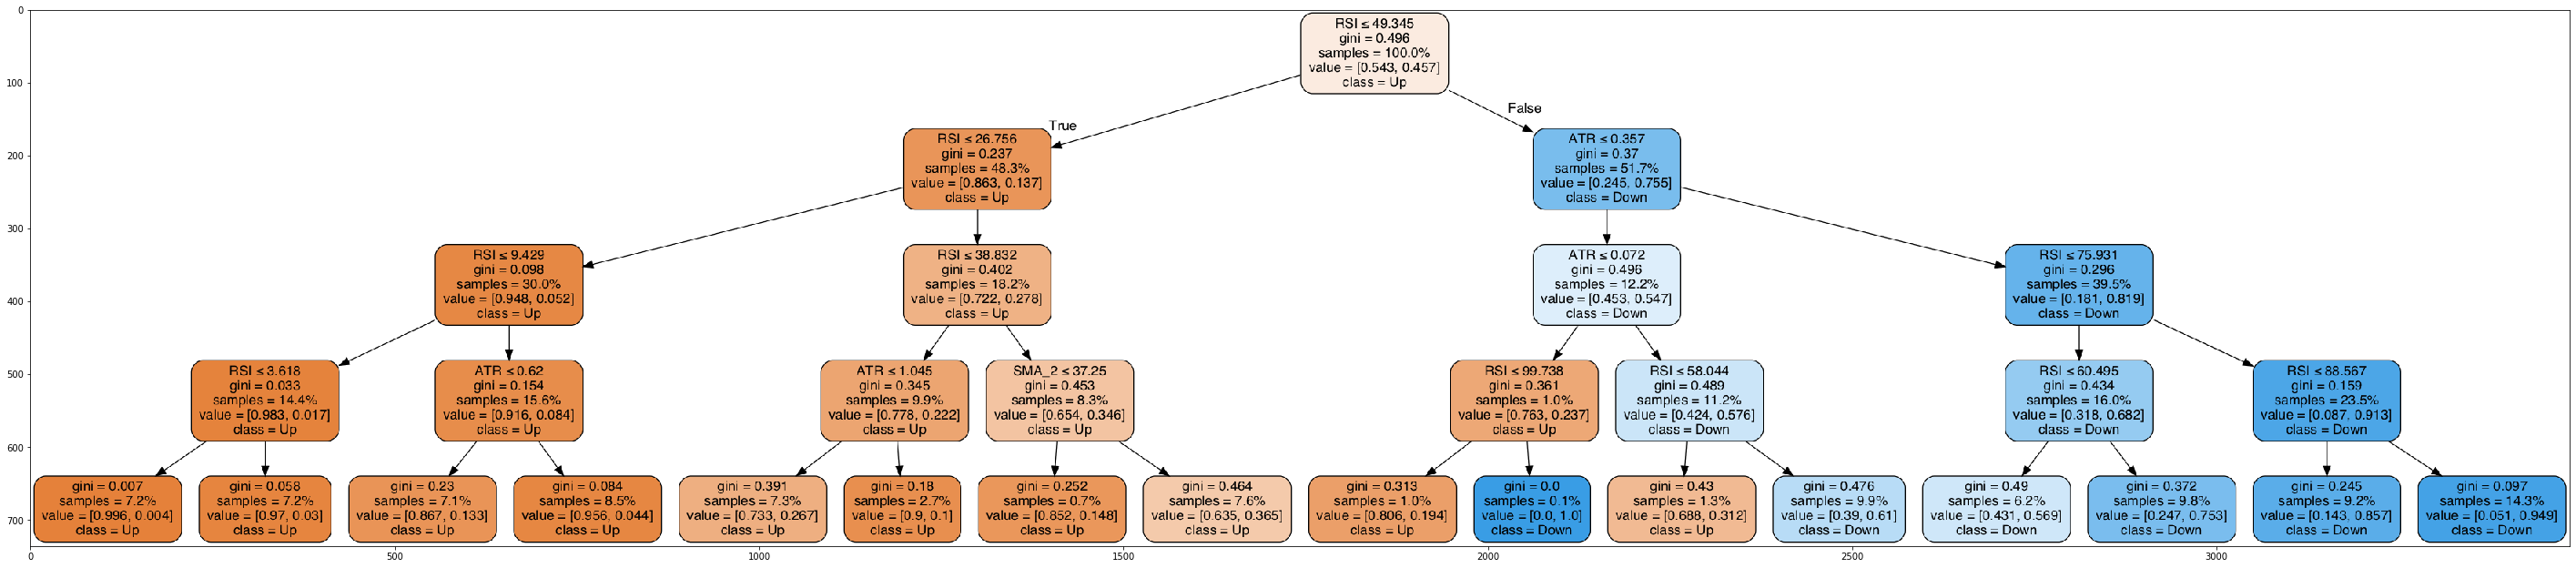

In [18]:
draw_tree(simple_tree)

In [20]:
simple_predictions = simple_tree.predict(X_test)
print(metrics.confusion_matrix(y_test, simple_predictions))

[[395 118]
 [ 71 347]]


In [21]:
print(metrics.accuracy_score(y_test, simple_predictions))

0.7969924812030075


In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, simple_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, simple_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, simple_predictions)))

Mean Absolute Error: 0.20300751879699247
Mean Squared Error: 0.20300751879699247
Root Mean Squared Error: 0.450563556889583


In [23]:
cross_val_score(simple_tree, X, y,
                scoring="roc_auc", 
                cv=3).mean()

0.8336390749484696

In [24]:
depths = np.arange(2,10) # define the depths
results = [] # create an empty data frame for our results

for depth in depths:
    best_depth_tree = DecisionTreeClassifier(max_depth = depth) # creating an instance of a decision tree
    results.append(cross_val_score(best_depth_tree, X, y, scoring="roc_auc", # getting the cv accuracy metric for the tree at each depth
                cv=3).mean())

In [27]:
test = pd.DataFrame({'depths':depths, 'mean_roc_auc':results})
test.sort_values("mean_roc_auc", ascending=False)

,depths,mean_roc_auc
1,3,0.878840
0,2,0.856136
2,4,0.834377
3,5,0.822379
4,6,0.799309
5,7,0.792012
6,8,0.773328
7,9,0.762916
